1. 인구 공공데이터 내려받기


*   인구 데이터 파일을 읽어온다
*   전체 데이터에서 한 줄씩 반복해서 읽어온다.
*   우리 동네에 대한 데이터인지 확인한다.
*   우리 동네일 경우 0세부터 100세 이상까지의 인구수를 순서대로 저장한다.
*   저장된 연령별 인구수 데이터를 시각화한다.





In [ ]:
import csv

f = open('/content/age.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

# 진짜 똑같은 것을 찾을 땐 == 사용
# 문자열 안에 키워드를 검색하고자 할 땐 in 연산자 사용하기

for row in data:
  

  

SyntaxError: ignored

신도림 데이터 확인하기
* in 연산자를 사용하여 우리동네 이름이 포함된 지역명 찾기 (유용함!!!)

In [ ]:
print('신도림' in '서울특별시 구로구 신도림동(11535100)')
print('1153' in '서울특별시 구로구 신도림동(11535100)')
print('(' in '서울특별시 구로구 신도림동(11535100)')

True
True
True


in 연산자를 활용해 우리 동네의 데이터 출력하기 --- 3번 해결(우리동네 데이터인지 확인)

In [1]:
import csv

f = open('/content/age.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

# 진짜 똑같은 것을 찾을 땐 == 사용
# 문자열 안에 키워드를 검색하고자 할 땐 in 연산자 사용하기

for row in data:
  if '율천동' in row[0]:
    print(row)

['경기도 수원시 장안구 율천동(4111156600)', '44,271', '44,271', '257', '270', '339', '380', '386', '361', '421', '404', '388', '394', '411', '442', '369', '345', '414', '411', '430', '454', '587', '803', '1,074', '1,086', '1,105', '1,141', '1,081', '1,086', '1,017', '875', '773', '709', '664', '585', '574', '610', '542', '612', '645', '710', '707', '715', '608', '692', '597', '638', '706', '721', '733', '839', '779', '784', '817', '699', '766', '725', '650', '583', '632', '644', '623', '562', '481', '417', '423', '397', '344', '264', '307', '203', '231', '244', '189', '185', '162', '146', '160', '152', '195', '174', '129', '157', '135', '123', '113', '106', '83', '74', '63', '42', '33', '41', '31', '23', '13', '15', '9', '9', '9', '3', '0', '1', '10']


연령 별 인구수(0세 ~ 100세 이상) 데이터 확인 --- 4번

In [2]:
import csv

f = open('/content/age.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
  if '율천동' in row[0]:
    print(row[3:]) # row[0]: 지역명, row[1]: 총인구수, row[2]: 연령구간인구수, row[3]~  인덱스 부터 연령별 인구 수
    print(len(row[3:])) # 0세부터 100세 이상 데이터 수 출력하기 -> 101개



['257', '270', '339', '380', '386', '361', '421', '404', '388', '394', '411', '442', '369', '345', '414', '411', '430', '454', '587', '803', '1,074', '1,086', '1,105', '1,141', '1,081', '1,086', '1,017', '875', '773', '709', '664', '585', '574', '610', '542', '612', '645', '710', '707', '715', '608', '692', '597', '638', '706', '721', '733', '839', '779', '784', '817', '699', '766', '725', '650', '583', '632', '644', '623', '562', '481', '417', '423', '397', '344', '264', '307', '203', '231', '244', '189', '185', '162', '146', '160', '152', '195', '174', '129', '157', '135', '123', '113', '106', '83', '74', '63', '42', '33', '41', '31', '23', '13', '15', '9', '9', '9', '3', '0', '1', '10']
101


우리동네 연령별 인구수 result 리스트에 저장하기 --- 시각화를 위해

In [7]:
import csv


f = open('/content/age.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

result = []

for row in data:
  if '율천동' in row[0]:
    for i in row[3:]:
      new_i = i.replace(',', '')
      result.append(int(new_i))  # 인구수 데이터 정수로 변환한 후 result 변수에 담기
print(result)

[257, 270, 339, 380, 386, 361, 421, 404, 388, 394, 411, 442, 369, 345, 414, 411, 430, 454, 587, 803, 1074, 1086, 1105, 1141, 1081, 1086, 1017, 875, 773, 709, 664, 585, 574, 610, 542, 612, 645, 710, 707, 715, 608, 692, 597, 638, 706, 721, 733, 839, 779, 784, 817, 699, 766, 725, 650, 583, 632, 644, 623, 562, 481, 417, 423, 397, 344, 264, 307, 203, 231, 244, 189, 185, 162, 146, 160, 152, 195, 174, 129, 157, 135, 123, 113, 106, 83, 74, 63, 42, 33, 41, 31, 23, 13, 15, 9, 9, 9, 3, 0, 1, 10]


우리동네 연령별 인구수 데이터 시각화하기

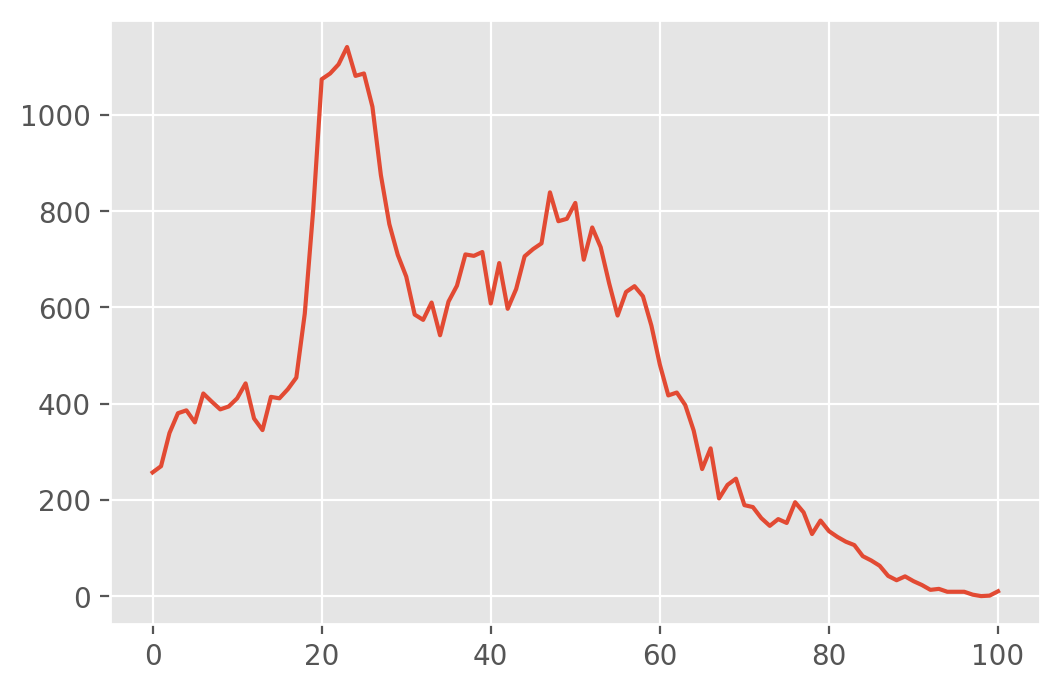

In [8]:
import csv
import matplotlib.pyplot as plt


f = open('/content/age.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

result = []

for row in data:
  if '율천동' in row[0]:
    for i in row[3:]:
      new_i = i.replace(',', '')
      result.append(int(new_i))  # 인구수 데이터 정수로 변환한 후 result 변수에 담기


plt.figure(dpi=200)
plt.style.use('ggplot')  # 격자무늬 스타일로 지정  classic, dark_background, ggplot
plt.plot(result)
plt.show()



matplotlib 다양한 스타일 확인하기